<a href="https://colab.research.google.com/github/anooprnathblq/DSA_Python/blob/main/Copy_of_Anoop_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Make ‘PassengerId’ as the index column
df.set_index('PassengerId',inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Check the basic details of the dataset
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
#Null Values in three  FIELDS NAMELY Age,Cabin,Embarked

In [ ]:
#Filling missing values in embarked column with mode as it is of object type
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
#decribe the feature age to see how it is to be distributed
df['Age'].mean()

29.69911764705882

In [ ]:
df['Age'].median()

28.0

In [ ]:
#As the mean and median of age sare too close it seems to be normally distributed and as such mean is used t fill the null
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
#checking uniqie values in cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


In [ ]:
#Cabin feature has lot of missing values.Also the uniquie values are also very high.Further the values seem to be not followig any pattern like number of digits.
#To derive a meanigful data fro cabin,it is asumed that the first letter is denoting the deck/cabi type and as such the
#feature cabin is replaced by the first letter of the value.

In [ ]:
df["Cabin"] = df["Cabin"].str.slice(0,1)

In [ ]:
#unique values of cabin
df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [ ]:
# before filling the missing values
#First the available values of Cabin are encoded manually


In [ ]:
# encoding the cabin feature with dictionary
deck_dict = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
df['Cabin']=df['Cabin'].map(deck_dict)

In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
3.0,59
2.0,47
4.0,33
5.0,32
1.0,15
6.0,13
7.0,4
8.0,1


In [ ]:
#Select the rows as a new df where  Cabin is not null
df1=df[df['Cabin'].notna()]

In [ ]:
df1.shape

(204, 11)

In [ ]:
#To check any correlation between PClass and Cabin feature
#Selct PClass and deck as another dataframe
df2=df1[['Pclass','Cabin']]

In [ ]:
df2.head()

,Pclass,Cabin
PassengerId,,
2,1,3.0
4,1,3.0
7,1,5.0
11,3,7.0
12,1,3.0


In [ ]:
#correlation of df2
df2.corr()

,Pclass,Cabin
Pclass,1.000000,0.598211
Cabin,0.598211,1.000000


In [ ]:
#Taking thatthere is a correlation between PCLass and Cabin trying to populate the Cabin missing values using amodel
#Building a knn model with df2 (non-nan data set)as training data,PClass as feature and Cabin as target variable
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
model=classifier.fit(df2[['Pclass']],df2['Cabin'])


In [ ]:
#filling df nan values with predictions from model with fill na
df['Cabin'].fillna(pd.Series(model.predict(df[['Pclass']])),inplace=True)

In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [ ]:
#All the missing values are filled

In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
6.0,383
5.0,348
3.0,59
2.0,47
4.0,33
1.0,15
7.0,4
8.0,2


In [ ]:
#To check whether any other characters likje ? is present in the df
#unique values in each clomn of the df
for i in df.columns:
  print(i,df[i].unique())

Survived [0 1]
Pclass [3 1 2]
Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'D

In [ ]:
#No other characters present

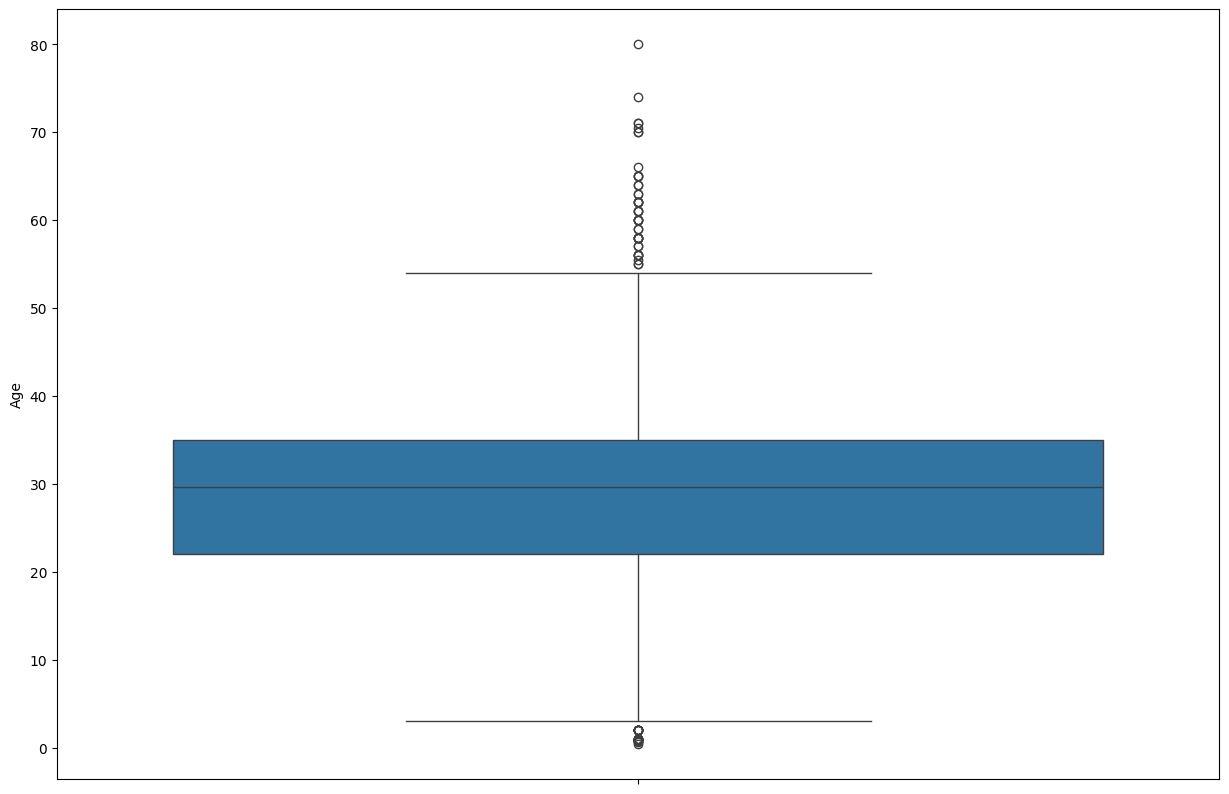

In [ ]:
#Checking outliers for Age
outliers= df['Age']
plt.figure(figsize=(15,10))
sns.boxplot(data = outliers)
plt.show()

In [ ]:
#Thogh outliers seesm to be in box plot,the number of ouleirs are comapritively high and considering that it is age and as such they are not deleted or clipped


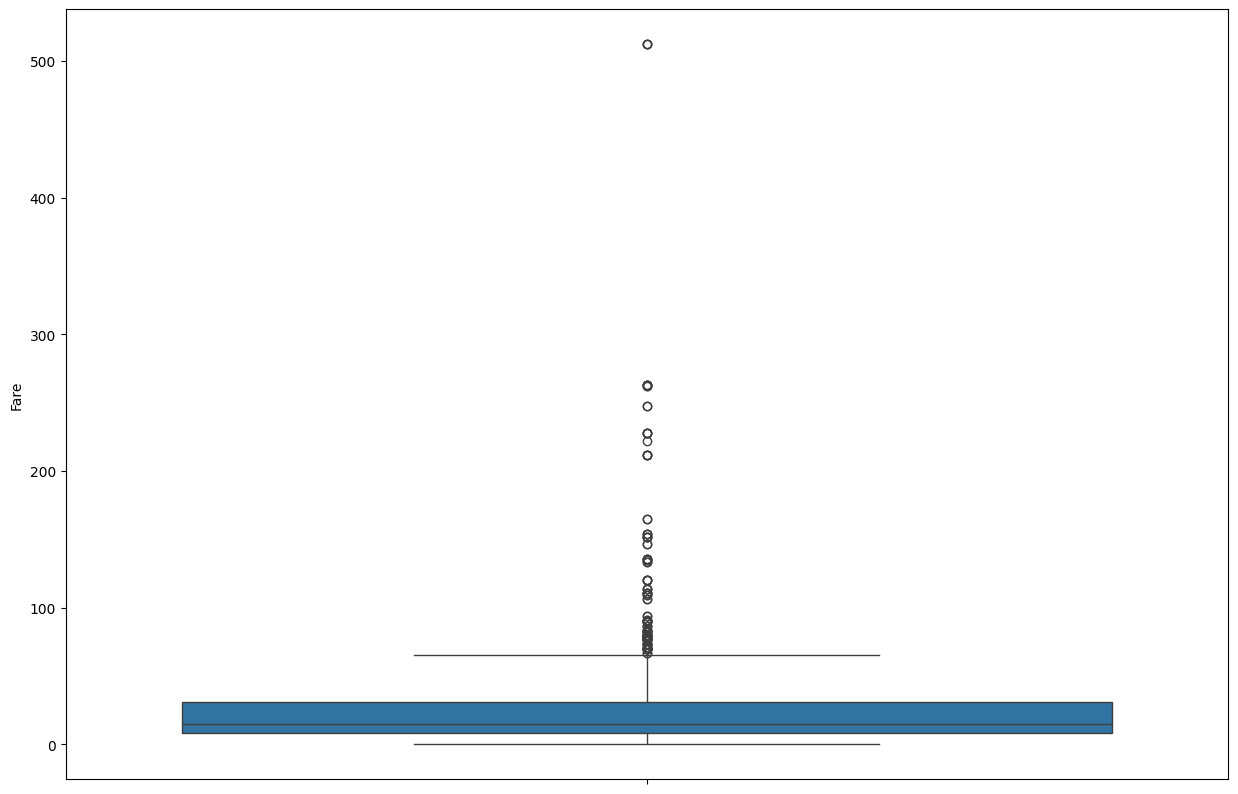

In [ ]:
#Checking outliers for fare
outliers= df['Fare']
plt.figure(figsize=(15,10))
sns.boxplot(data = outliers)
plt.show()

In [ ]:
#Checking how many values are above 300
df[df['Fare']>300].Fare.count()

3

In [ ]:
#Checking how many values are above 250
df[df['Fare']>250].Fare.count()

9

In [ ]:
#Checking how many values are above 200
df[df['Fare']>200].Fare.count()

20

In [ ]:
#Though outliers seesm to be in box plot,the number of ouleirs are comapritively high
#and considering that it is fare removing only the rows whose fares are grater than 300 ie 3 numbers which are completely out of range

In [ ]:
#Removing Outliers
df=df[df['Fare']<=300]

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck'],
      dtype='object')

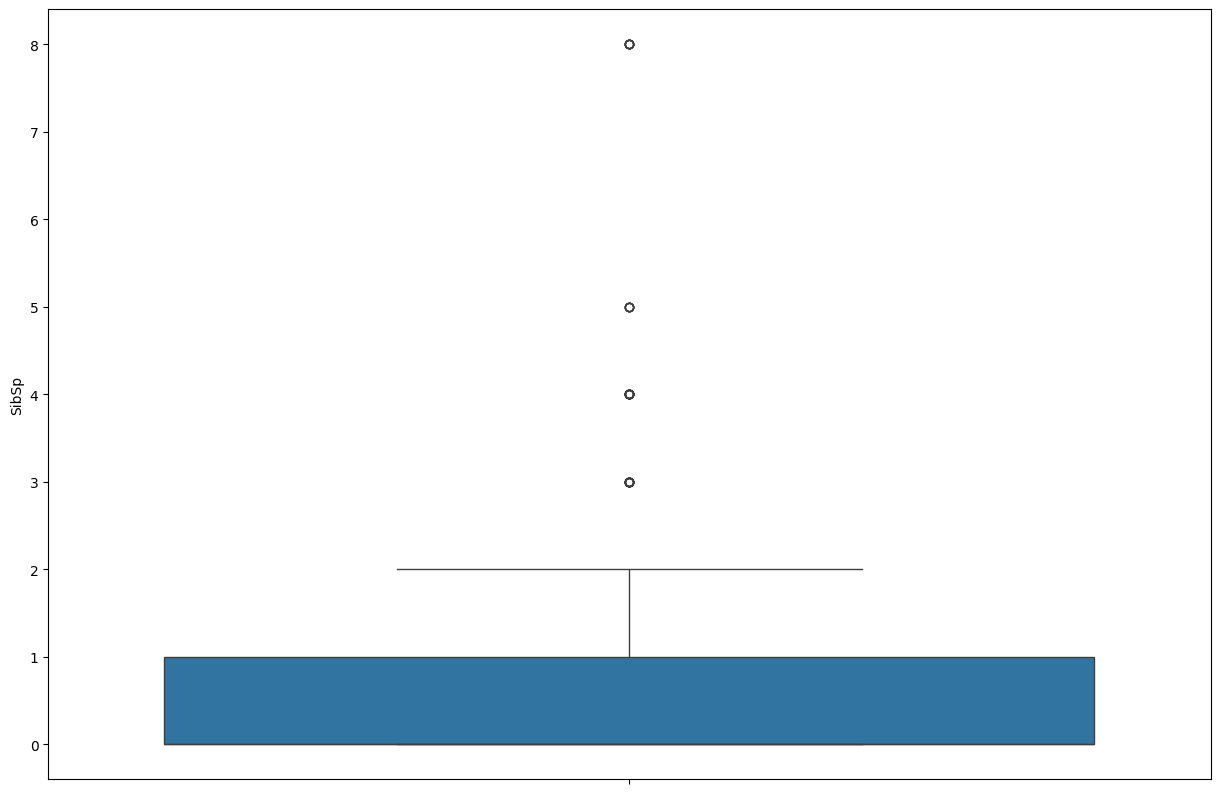

In [ ]:
#Checking outliers for SibSp
outliers= df['SibSp']
plt.figure(figsize=(15,10))
sns.boxplot(data = outliers)
plt.show()

In [ ]:
#Checking how many values are above 300
df[df['SibSp']>5].SibSp.count()

7

In [ ]:
#Taking that the 7 values above 5 are outliers  for the feature siblingsand  bringing those values to 5
df['SibSp']=np.where(df['SibSp']>5,5,df['SibSp'])


In [ ]:
#Checking how many values are above 300
df[df['SibSp']>5].SibSp.count()

0

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,5.0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3.0,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,5.0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3.0,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,6.0,S


In [ ]:
#Scaling the feature set age and fare
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df['Age']=mm.fit_transform(df[['Age']])
df['Fare']=mm.fit_transform(df[['Fare']])

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.027567,5.0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.271039,3.0,C
3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.030133,5.0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.201901,3.0,S
5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.030608,6.0,S


In [ ]:
#Encoding the feature Embarked by one hot encoding
df=pd.get_dummies(df,columns=['Embarked'],dtype=int)


In [ ]:
#Encoding the feature sex by one hot encoding
df=pd.get_dummies(df,columns=['Sex'],dtype=int)

In [ ]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,0.027567,5.0,0,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,PC 17599,0.271039,3.0,1,0,0,1,0
3,1,3,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,0.030133,5.0,0,0,1,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,113803,0.201901,3.0,0,0,1,1,0
5,0,3,"Allen, Mr. William Henry",0.434531,0,0,373450,0.030608,6.0,0,0,1,0,1
